In [133]:
%matplotlib inline

import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statistics
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [2]:
ufc_df = pd.read_excel(r'C:\Users\Calebjc\Desktop\DSC520 Stats\dsc520-master\data\ufc_test_DSC530.xlsx')

In [3]:
ufc_df.head()

,date,location,country,weight_class,fightID,fighterCornerName,fighterName,Corner,fighterStance,fightWinner,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_TD_landed,avg_TD_pct,fighterOdds,favorite
0,8/1/2020,"Las Vegas, Nevada, USA",USA,Middleweight,1,B_fighter,Edmen Shahbazyan,Blue,Orthodox,0,4.11,0.52,6.77,0.40,-360,1
1,8/1/2020,"Las Vegas, Nevada, USA",USA,Middleweight,1,R_fighter,Derek Brunson,Red,Southpaw,1,3.39,0.45,2.80,0.29,275,0
2,8/1/2020,"Las Vegas, Nevada, USA",USA,Women's Flyweight,2,B_fighter,Jennifer Maia,Blue,Orthodox,1,4.05,0.38,0.25,0.50,130,0
3,8/1/2020,"Las Vegas, Nevada, USA",USA,Women's Flyweight,2,R_fighter,Joanne Calderwood,Red,Orthodox,0,6.19,0.47,1.85,0.56,-162,1
4,8/1/2020,"Las Vegas, Nevada, USA",USA,Welterweight,3,B_fighter,Randy Brown,Blue,Orthodox,0,3.41,0.47,0.95,0.46,160,0


## Histograms, Outliers, and Descriptive Statistics

Text(0, 0.5, 'Number of Fighters')

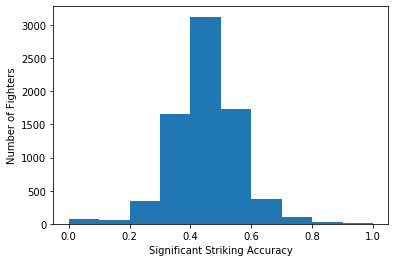

In [38]:
avg_SIG_STR_pct_plot = plt.hist(ufc_df['avg_SIG_STR_pct'].dropna())
plt.xlabel('Significant Striking Accuracy')
plt.ylabel('Number of Fighters')

In [5]:
avg_SIG_STR_pct_mean = round(statistics.mean(ufc_df['avg_SIG_STR_pct'].dropna()), 4)
avg_SIG_STR_pct_mode = round(statistics.mode(ufc_df['avg_SIG_STR_pct'].dropna()), 4)
avg_SIG_STR_pct_var = round(statistics.variance(ufc_df['avg_SIG_STR_pct'].dropna()), 4)


print('The average significant striking accuracy is ' + str(avg_SIG_STR_pct_mean))
print('The mode of the significant striking accuracy is ' + str(avg_SIG_STR_pct_mode))
print('The spread of the significant striking accuracy is ' + str(avg_SIG_STR_pct_var))

The average significant striking accuracy is 0.4501
The mode of the significant striking accuracy is 0.46
The spread of the significant striking accuracy is 0.0125


Text(0, 0.5, 'Number of Fighters')

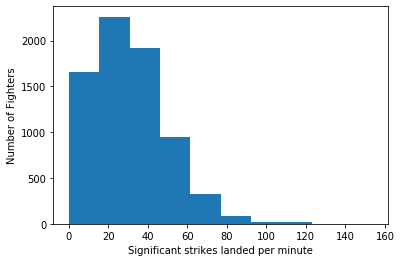

In [40]:
avg_SIG_STR_landed_plot = plt.hist(ufc_df['avg_SIG_STR_landed'])
plt.xlabel('Significant strikes landed per minute')
plt.ylabel('Number of Fighters')

In [7]:
avg_SIG_STR_landed_mean = round(statistics.mean(ufc_df['avg_SIG_STR_landed'].dropna()), 4)
avg_SIG_STR_landed_mode = round(statistics.mode(ufc_df['avg_SIG_STR_landed'].dropna()), 4)
avg_SIG_STR_landed_var = round(statistics.variance(ufc_df['avg_SIG_STR_landed'].dropna()), 4)


print('The average significant strikes landed per minute is ' + str(avg_SIG_STR_landed_mean))
print('The mode of the significant strikes landed per minute is ' + str(avg_SIG_STR_landed_mode))
print('The spread of the significant strikes landed per minute is ' + str(avg_SIG_STR_landed_var))

The average significant strikes landed per minute is 30.5637
The mode of the significant strikes landed per minute is 0.0
The spread of the significant strikes landed per minute is 383.9136


Text(0.5, 0, 'Average takedowns landed per 15 minutes')

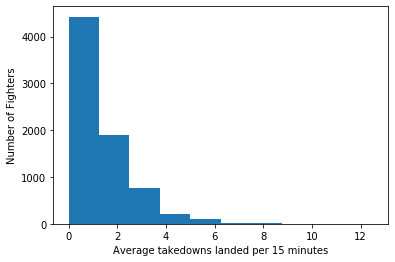

In [41]:
plt.hist(ufc_df['avg_TD_landed'])
plt.ylabel('Number of Fighters')
plt.xlabel('Average takedowns landed per 15 minutes')

In [9]:
avg_TD_landed_mean = round(statistics.mean(ufc_df['avg_TD_landed'].dropna()), 4)
avg_TD_landed_mode = round(statistics.mode(ufc_df['avg_TD_landed'].dropna()), 4)
avg_TD_landed_var = round(statistics.variance(ufc_df['avg_TD_landed'].dropna()), 4)


print('The average average takedowns landed per 15 minutes is ' + str(avg_TD_landed_mean))
print('The mode of the average takedowns landed per 15 minutes is ' + str(avg_TD_landed_mode))
print('The spread of the average takedowns landed per 15 minutes is ' + str(avg_TD_landed_var))

The average average takedowns landed per 15 minutes is 1.277
The mode of the average takedowns landed per 15 minutes is 0.0
The spread of the average takedowns landed per 15 minutes is 1.607


Text(0.5, 0, 'Take down accuracy')

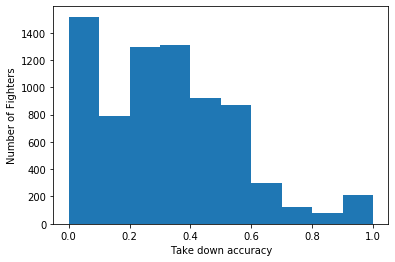

In [42]:
plt.hist(ufc_df['avg_TD_pct'])
plt.ylabel('Number of Fighters')
plt.xlabel('Take down accuracy')

In [11]:
avg_TD_pct_mean = round(statistics.mean(ufc_df['avg_TD_pct'].dropna()), 4)
avg_TD_pct_mode = round(statistics.mode(ufc_df['avg_TD_pct'].dropna()), 4)
avg_TD_pct_var = round(statistics.variance(ufc_df['avg_TD_pct'].dropna()), 4)


print('The average takedown accuracy is ' + str(avg_TD_pct_mean))
print('The mode of the takedown accuracy is ' + str(avg_TD_pct_mode))
print('The spread of the takedown accuracy is ' + str(avg_TD_pct_var))

The average takedown accuracy is 0.3157
The mode of the takedown accuracy is 0.0
The spread of the takedown accuracy is 0.0547


## PMF

In [21]:
ufc_df_winners = ufc_df[ufc_df.fightWinner == 1] 

In [23]:
pmf_df = pd.DataFrame(ufc_df['avg_SIG_STR_pct'].value_counts())
pmf_df_2 = pd.DataFrame(ufc_df_winners['avg_SIG_STR_pct'].value_counts())

pmf_df.columns = ["Counts"]
pmf_df_2.columns = ["Counts"]

In [24]:
pmf_df["Prob"] = pmf_df["Counts"]/len(ufc_df)
pmf_df_2["Prob"] = pmf_df_2["Counts"]/len(ufc_df_winners)

(array([1639.,   37.,   11.,    3.,    6.,    3.,    3.,    6.,    4.,
           3.]),
 array([0.0001159 , 0.00179648, 0.00347705, 0.00515763, 0.0068382 ,
        0.00851878, 0.01019935, 0.01187993, 0.0135605 , 0.01524108,
        0.01692165]),
 <a list of 10 Patch objects>)

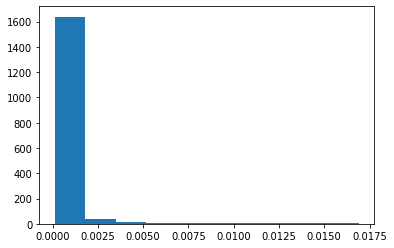

In [25]:
plt.hist(pmf_df["Prob"])

(array([1.07e+03, 2.60e+01, 1.00e+01, 5.00e+00, 4.00e+00, 2.00e+00,
        9.00e+00, 2.00e+00, 1.00e+00, 2.00e+00]),
 array([0.0002318 , 0.00222531, 0.00421882, 0.00621233, 0.00820584,
        0.01019935, 0.01219286, 0.01418637, 0.01617988, 0.01817339,
        0.0201669 ]),
 <a list of 10 Patch objects>)

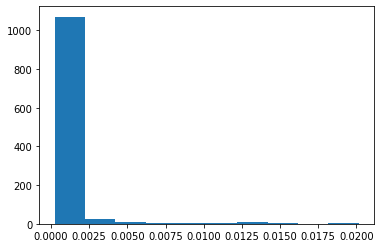

In [27]:
plt.hist(pmf_df_2["Prob"])

## CDF

In [31]:
x = np.sort(ufc_df['avg_SIG_STR_pct'])
y = np.arange(1, len(x) + 1) / len(x)

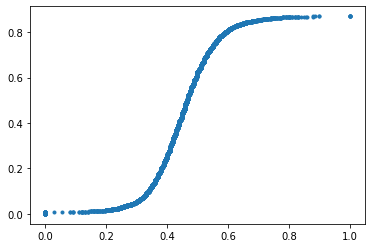

In [33]:
ufc_cdf_plot = plt.plot(x,y,marker='.', linestyle = 'none')

ufc_cdf_plot

In [35]:
print('This shows that the variable is normally distributed')

This shows that the variable is normally distributed


## Normal Distribution

In [44]:
from scipy.stats import norm
import thinkplot

ModuleNotFoundError: No module named 'thinkplot'

## Scatter Plots

Text(0.5, 0, 'Significant Strikes Landed')

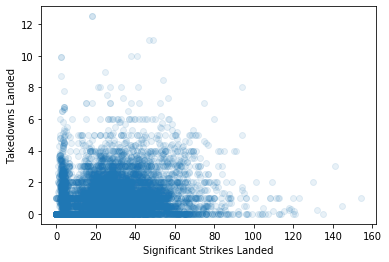

In [80]:
plt.scatter(ufc_df['avg_SIG_STR_landed'], ufc_df['avg_TD_landed'], alpha = 0.1)
plt.ylabel('Takedowns Landed')
plt.xlabel('Significant Strikes Landed')

In [58]:
from scipy.stats.stats import pearsonr
ufc_dropped_na = ufc_df.dropna()

In [77]:
pearson_corr_1 = pearsonr(ufc_dropped_na['avg_SIG_STR_landed'], ufc_dropped_na['avg_TD_landed'])
print('The Pearson correlation coefficient is ' + str(pearson_corr_1[0]))

The Pearson correlation coefficient is 0.03651250484035231


Text(0.5, 0, 'Significant Strikes Accuracy (%)')

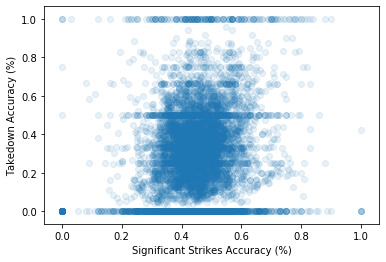

In [82]:
plt.scatter(ufc_df['avg_SIG_STR_pct'], ufc_df['avg_TD_pct'], alpha = 0.1)
plt.ylabel('Takedown Accuracy (%)')
plt.xlabel('Significant Strikes Accuracy (%)')

In [84]:
pearson_corr_2 = pearsonr(ufc_dropped_na['avg_SIG_STR_pct'], ufc_dropped_na['avg_TD_pct'])
print('The Pearson correlation coefficient is ' + str(pearson_corr_2[0]))

The Pearson correlation coefficient is 0.16668533445617667


## Run Tests

In [88]:
print('Does fighter corner affect winning?')

Does fighter corner affect winning?


### Linear Regression

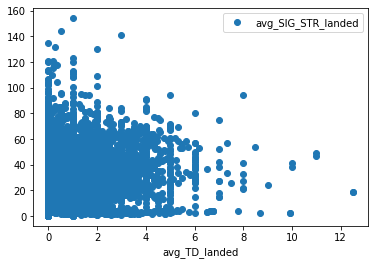

In [144]:
ufc_df.plot(x = 'avg_TD_landed', y = 'avg_SIG_STR_landed', style = 'o')

In [154]:
x = ufc_dropped_na['avg_TD_landed'].values.reshape(-1,1)
y = ufc_dropped_na['avg_SIG_STR_landed'].values.reshape(-1,1)

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [156]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
regressor  = LinearRegression()

In [160]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
#To retrieve the intercept:
print('The y intercept: ' + str(regressor.intercept_))
#For retrieving the slope:
print('Beta 1: ' + str(regressor.coef_))

The y intercept: [29.60669615]
Beta 1: [[0.65405513]]
